# Neo4j Graph Export

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy("neo4j")

In [3]:
# The reddit API needs these credentials
reddit_api_credentials = {
    "client_id": ' ',
    "client_secret": ' ',
    "user_agent": ' ',
    "username": " ",
    "password": " "
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Comments in a Submission

In [4]:
graph = graphipy.create_graph("neo4j", " ")
graph.delete_graph()

In [5]:
submission_id = "9uolpb"
reddit.fetch_submission_comments(graph, submission_id, limit=5)

# Visualization with NetworkX

In [6]:
import networkx as nx

In [7]:
nx_graph = nx.Graph()

In [8]:
nodes = graph.get_nodes()

In [9]:
edges = graph.get_edges()

In [10]:
for edge in edges:
    edge = edge["r"]
    source = edge["Source"]
    target = edge["Target"]
    attr = {
        "Label": edge["Label"],
        "label_attribute": edge["label_attribute"],
        "_id": edge["_id"]
    }
    nx_graph.add_edge(source, target, attr_dict=attr)

In [11]:
for node in nodes:
    node = node["n"]
    node_id = node["_id"]
    nx_node = nx_graph.node[node_id]
    for attr in node.keys():
        nx_node[attr] = node[attr]

In [12]:
nx.draw(nx_graph)

# Visualization with NetworkX from CSV Files

In [13]:
# Export graph as CSV files
prefix = "neo4j"
graph.export_all_CSV(prefix) # will create csv files in csv/<prefix>/ directory

In [14]:
g = nx.Graph()

In [15]:
# Import CSV files
import os
import csv
path = os.getcwd() + "\\csv\\" + prefix + "\\"
edges_path = path + "edges\\"

for filename in os.listdir(edges_path):
    reader = csv.DictReader(open(edges_path + filename))
    for edge in reader:
        source = edge["Source"]
        target = edge["Target"]
        attr = {
            "Label": edge["Label"],
            "label_attribute": edge["label_attribute"],
            "_id": edge["_id"]
        }
        g.add_edge(source, target, attr_dict=attr)

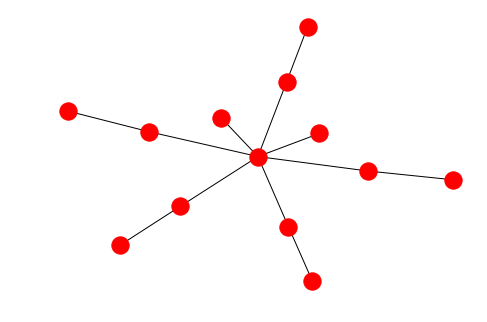

In [16]:
# Draw the graph without node labels
nx.draw(g)

In [17]:
# Add node attributes
nodes_path = path + "nodes\\"

for filename in os.listdir(nodes_path):
    reader = csv.DictReader(open(nodes_path + filename))
    for node in reader:
        node_id = node["_id"]
        nx_node = g.node[node_id]
        for attr in node.keys():
            nx_node[attr] = node[attr]

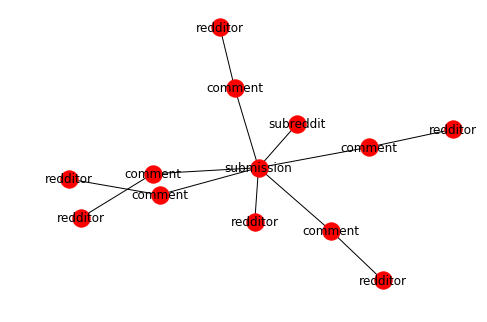

In [18]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in g.nodes(data=True))
nx.draw(g, labels=labels)